# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To identify which variables are significant in predicting the demand for shared bikes.

- To create a linear model that quantitatively relates total number of bike rentals (bike demands) with variables such as year, month, holiday, weekday, working day, temp etc.

- To know the accuracy of the model, i.e. How well those variables describe the bike demands.

**So interpretation is important!**

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Following below steps for building model:

1) Reading and understanding the data

2) Visualizing the data

3) Preparing the data for model training 

4) Splitting the Data into Training and Testing Sets

5) Building a linear model

6) Residual Analysis of the train data

7) Making Predictions and Evalaution Using the Final Model

### Assumptions:-

weekday is interpreted as: 
- 0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'

weathersit is interpreted as:
- 1:'good',2:'moderate',3:'bad',4:'extreme'

## Step 1: Reading and Understanding the Data

Importing libraries which would be required for model building

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
bike_sharing_data = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect various aspects of the Bike-Sharing dataframe

In [4]:
bike_sharing_data.shape

(730, 16)

In [5]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

- Convert season, weathersit, weekday and month into categorical

In [7]:
bike_sharing_data.season = bike_sharing_data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike_sharing_data.weathersit = bike_sharing_data.weathersit.map({1:'good',2:'moderate',3:'bad',4:'extreme'})

bike_sharing_data.mnth = bike_sharing_data.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',
                                                     8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing_data.weekday = bike_sharing_data.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_sharing_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,thu,1,moderate,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,fri,1,moderate,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,sat,0,moderate,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,sun,0,good,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Dropping columns
- 'casual' and 'registered', as we would be using 'cnt' as target varibale which contains sum of both
- 'instant' as it  is unique sequence number which won't be useful in our analysis
- 'dteday' as we already have column for year and month

In [8]:
bike_sharing_data = bike_sharing_data.drop(['casual','registered','instant', 'dteday'], axis=1)

In [9]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600




## Step 2: Visualising the Data

Let's perform the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, we would catch it here
- Here's where we should also identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

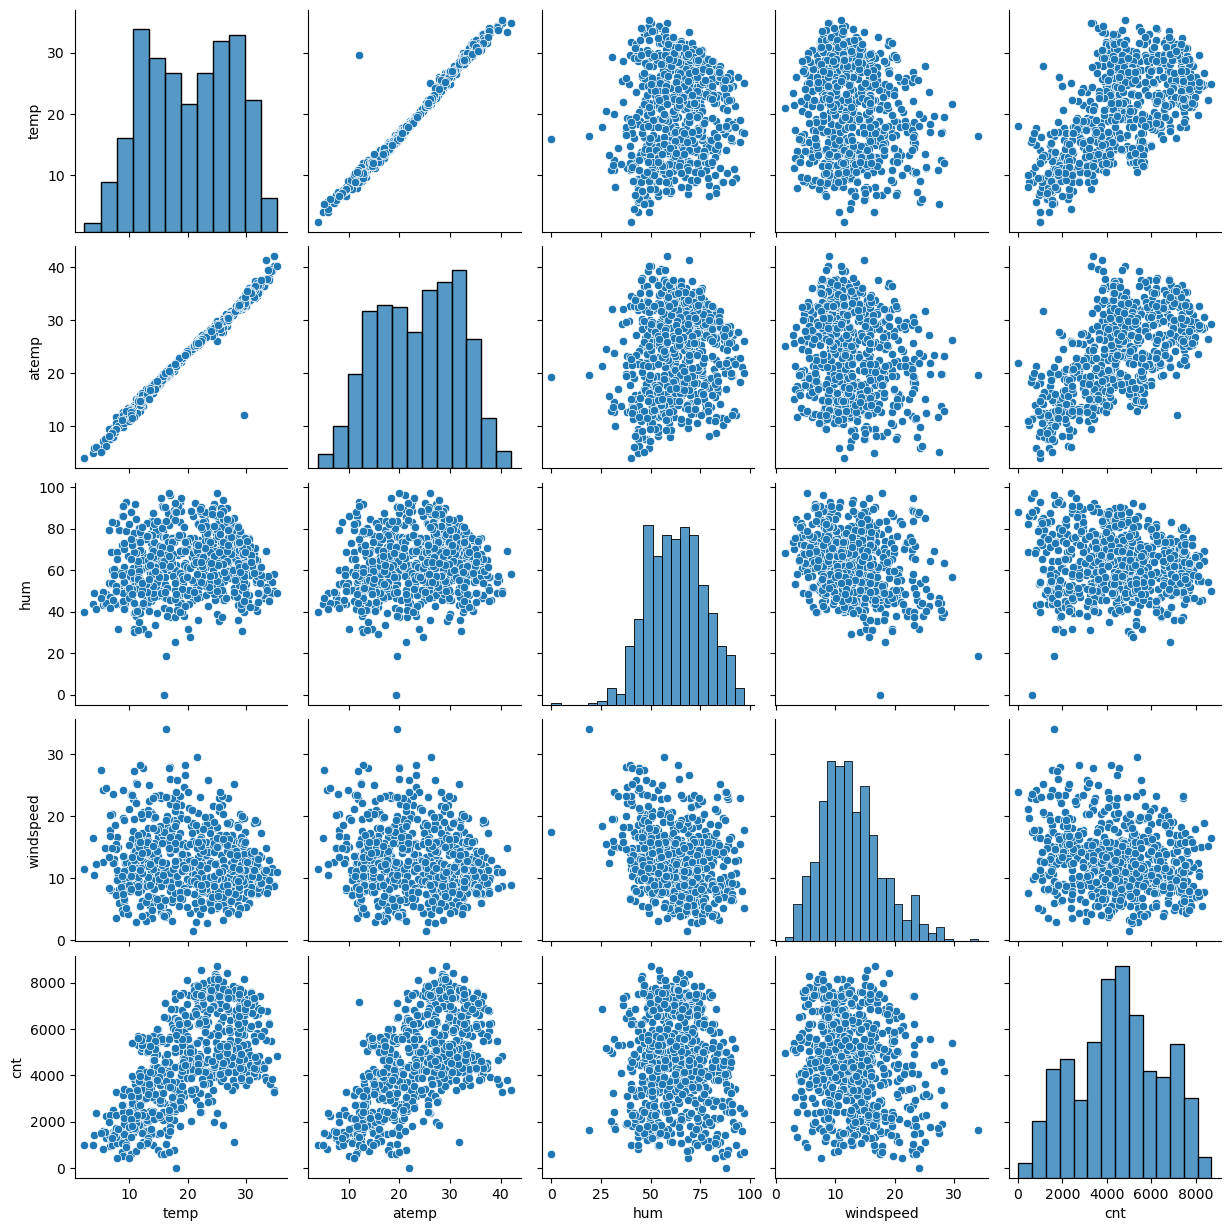

In [10]:
sns.pairplot(bike_sharing_data[['temp','atemp','hum','windspeed','cnt']])
plt.show()

# Observation:

- 'temp' and 'atemp' are strongly corelated, we might have to drop one of them
- 'cnt' total count of rental bike demand is corelated with temp and atemp

### Creating the correlation matrix

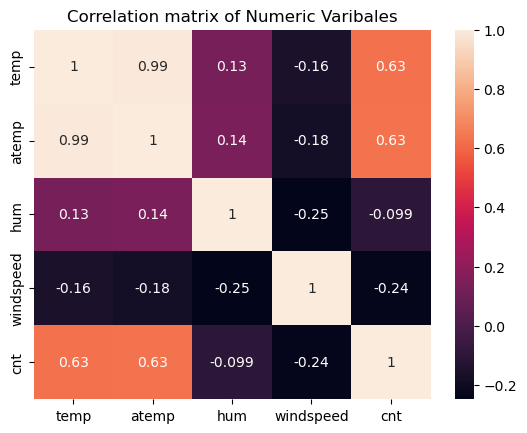

In [11]:
#Heat map for correlation
sns.heatmap(bike_sharing_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.title('Correlation matrix of Numeric Varibales')
plt.show()

In [12]:
bike_sharing_data = bike_sharing_data.drop(['atemp'], axis=1)

### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for these variables.

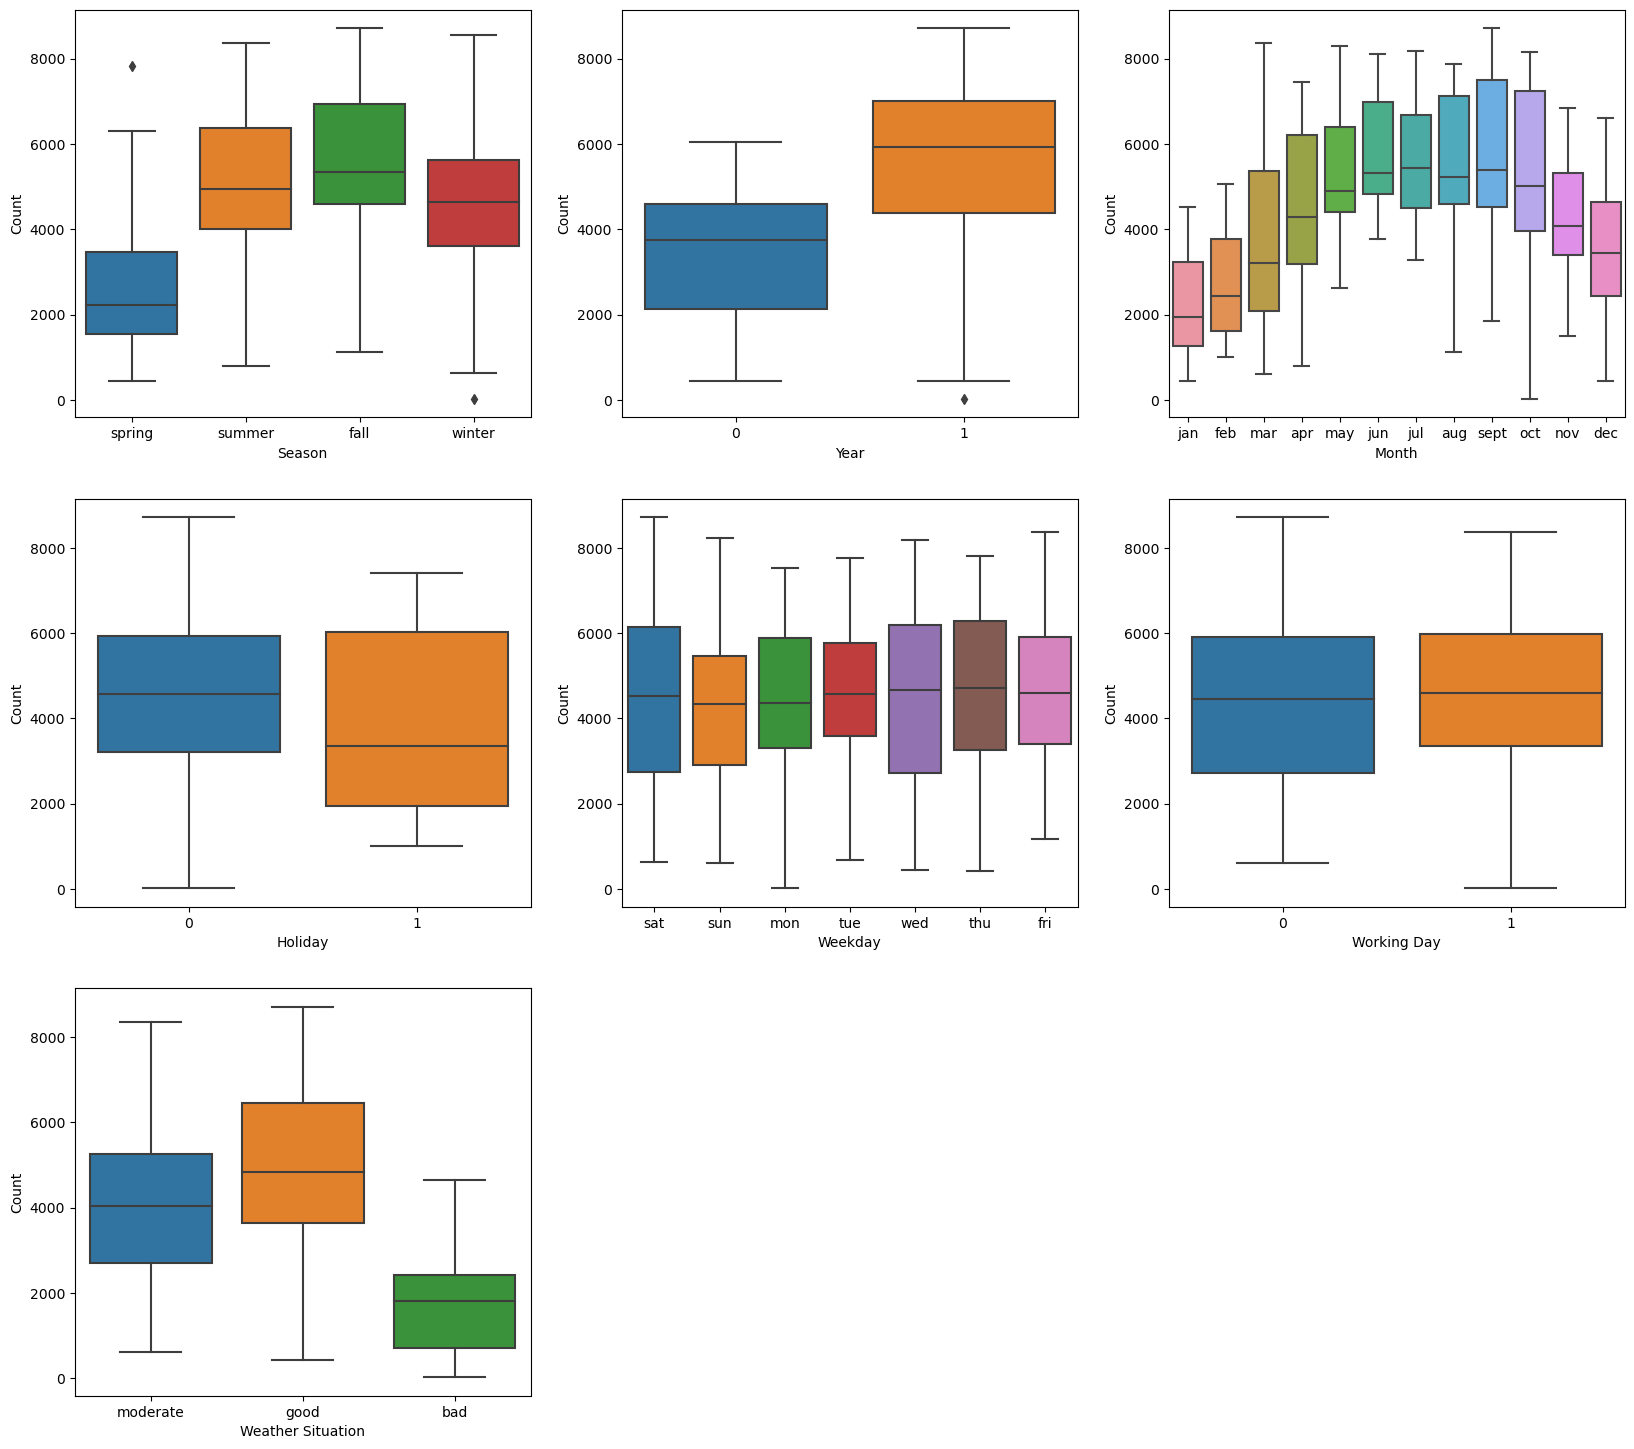

In [13]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Season')
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Year')
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Month')
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Holiday')
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Weekday')
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Working Day')
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data)
plt.ylabel('Count')
plt.xlabel('Weather Situation')
plt.show()

# Observation:


- Demand of rental bike is highest during 'fall' season followed by 'summer', then 'winter' and least during 'spring'
- There is an increase in demand, on year on year basis(from 2018 to 2019)
- People tend to rent bike in a good weather situation
- Demand increases from January to June, then it remains a bit steady or there is a slow increase, September been the highest, followed by October. Demand decreases drastically from October to November and December
- Not getting much insights from weekday column as the medians for all the days are not deviating much, although Wednesdays and Saturdays has a wider range from low to high demand.
- Demand is mostly on the higher side during non-holidays, but highest demand remains the same for holidays and no-holidays.
- Not getting much insights from workingday column as the medians are around the same range, with mostly higher demand during working day.


#### Normal Probability Plot

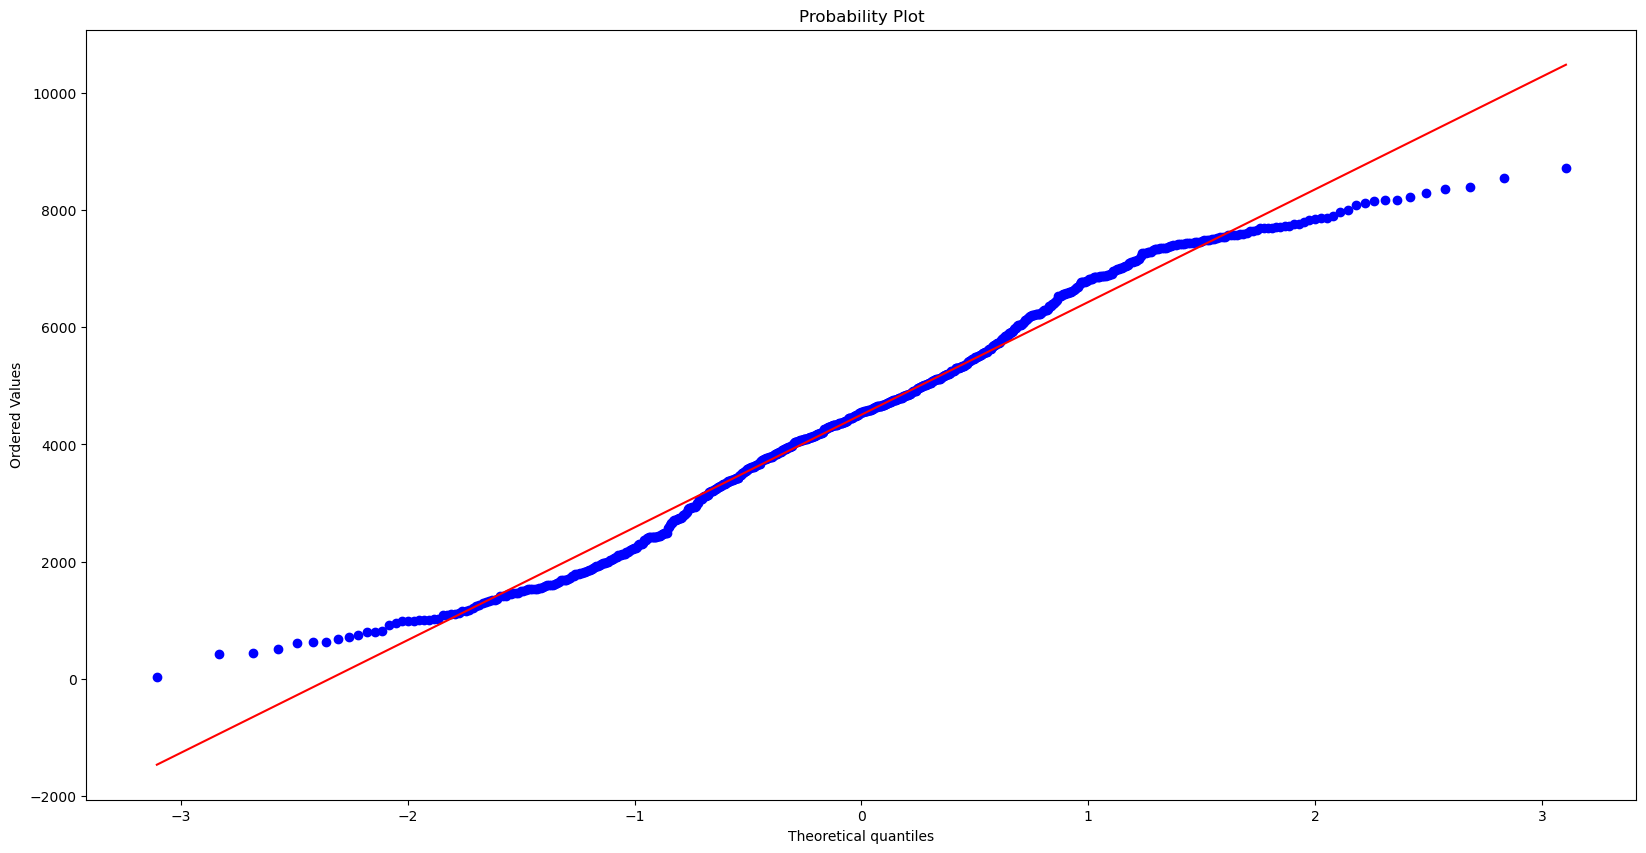

In [14]:
fig=plt.figure(figsize=(20,10))
stats.probplot(bike_sharing_data.cnt.tolist(),dist='norm',plot=plt)
plt.show()

### Observation:
- Few target variable data points are deviating from normality

## Step 3: Data Preparation

### Dummy Variables

The variable ['season','mnth','weekday','weathersit'] has multiple levels. Lets convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [15]:
categorical_col = ['season','mnth','weekday','weathersit']
bike_data_with_dummy_var = pd.get_dummies(data=bike_sharing_data, columns = categorical_col, drop_first=True)
bike_data_with_dummy_var.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_data_with_dummy_var, train_size = 0.7, random_state = 100)

In [17]:
#Verifying the data rows in each data set
print("Total: ",bike_data_with_dummy_var.shape)
print("Train: ",df_train.shape)
print("Test: ",df_test.shape)

Total:  (730, 29)
Train:  (510, 29)
Test:  (220, 29)


### Rescaling the Features 

Scaling doesn't impact our model. Here we can see that values of few features are lying withing smaller range and for few features the range is on higher side . So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

- Using Min-Max scaling to get all the values withing the range of 0 to 1

In [18]:
#Creating scaler object
scaler = MinMaxScaler()

In [19]:
# Applying scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
#Validating if scaled values are within 0 to 1 range
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


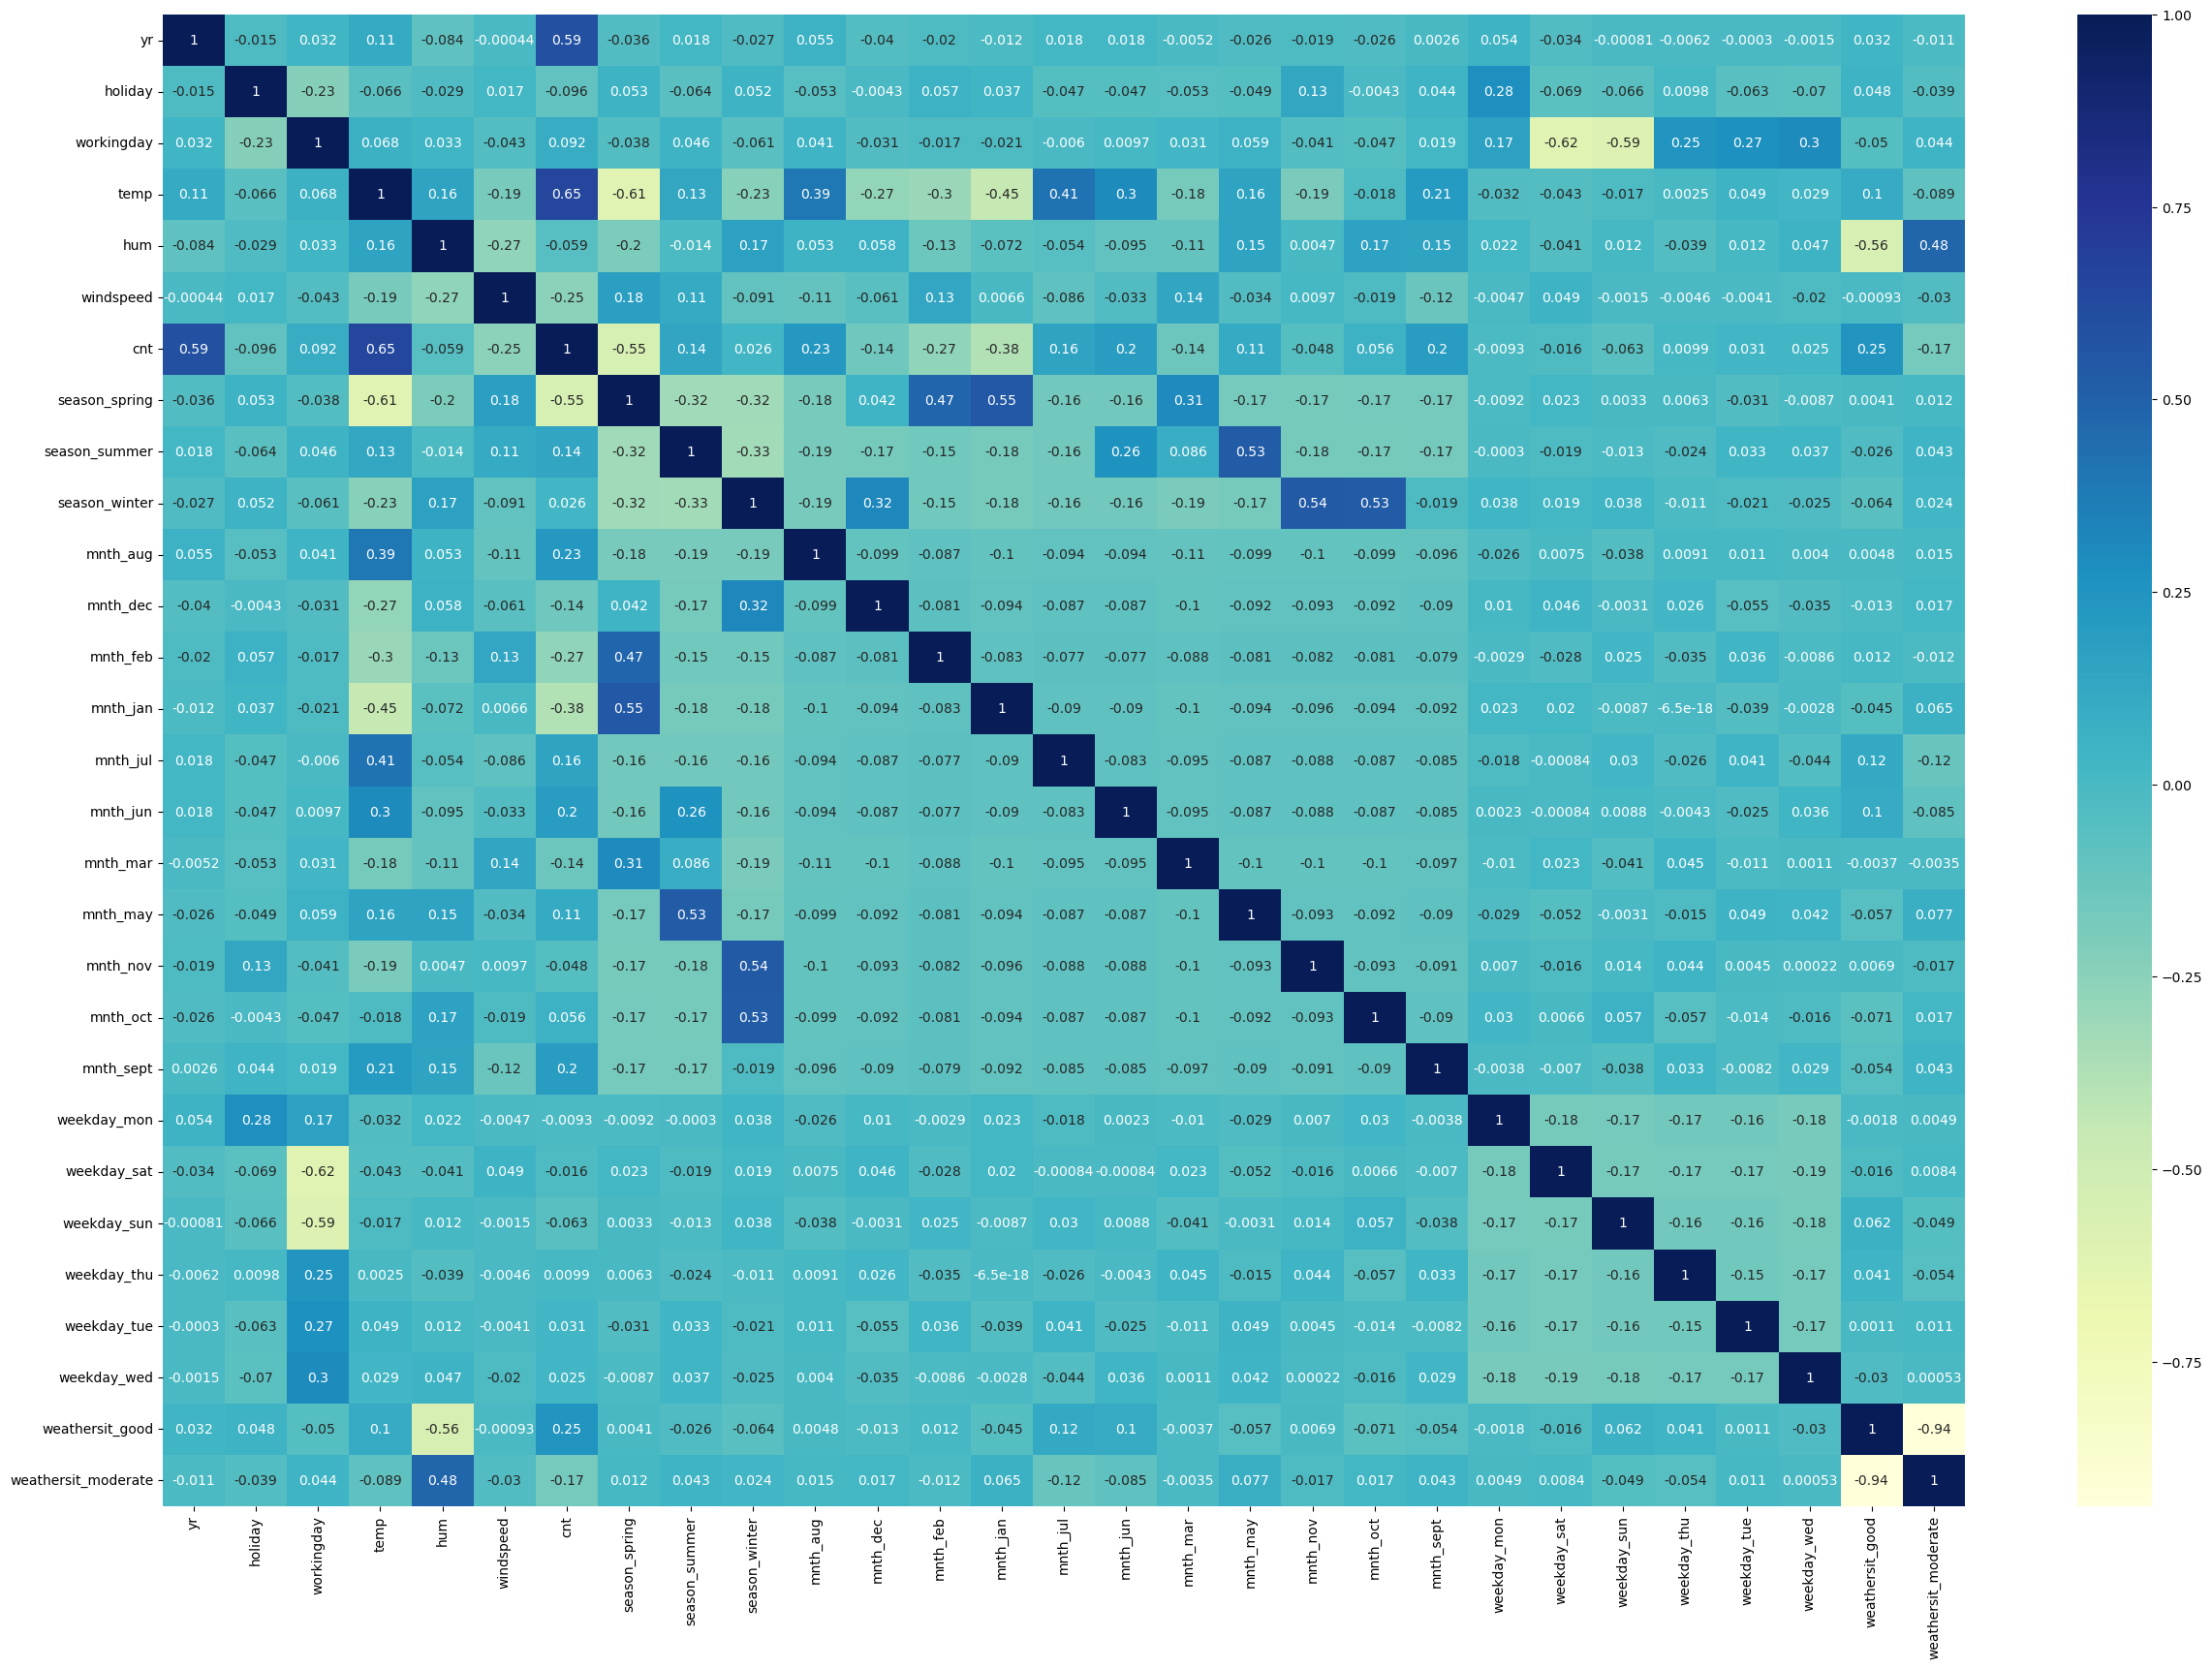

In [22]:
#checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Observation:
- 'cnt' is highly corelated with 'temp' and 'yr'

Plotting a scatter plot `temp` vs `cnt`

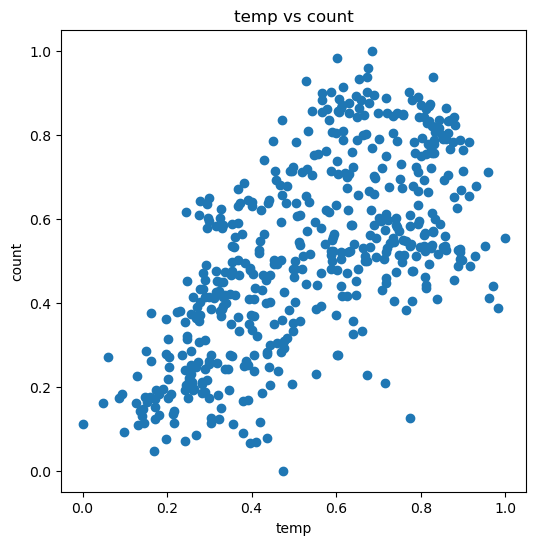

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('temp vs count')
plt.show()

###### `temp` is picked as the first variable and will try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fiting a regression line through the training data using `statsmodels`. We need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

# Model#1 using one variable `temp`, manual approach

In [25]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
# Check the parameters obtained

lr.params

const    0.169031
temp     0.640944
dtype: float64

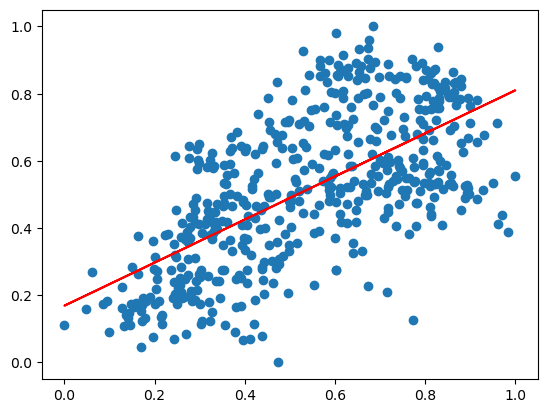

In [27]:
# visualizing the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], lr.params['const'] + lr.params['temp']*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [28]:
# Printing the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.46e-61
Time:                        00:19:47   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

##### As there are 30 variable, it would not be an efficient way to keep adding or removing column one by one 

## Model Selection using RFE

#### Defining function for creating model

In [29]:
#Function for building model using statsmodel
def model_fit_sm(X_train_rfe, y_train):
    X_train_rfe_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe_sm).fit() 
    print(lm.summary()) # printing model summary for analysis 
    return lm

#### Defining function for calculating VIF

In [30]:
#Function for calculating VIF
def calculate_vif(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 10),
 ('mnth_feb', False, 13),
 ('mnth_jan', False, 14),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 9),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model#2 with 15 variables selected using RFE

In [36]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.11e-191
Time:                        00:19:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0035    

,Features,VIF
2,workingday,94.54
11,weekday_sat,22.15
12,weekday_sun,21.46
13,weathersit_good,10.25
14,weathersit_moderate,8.87
6,season_spring,5.02
1,holiday,4.66
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62


#### Dropping `workingday` as it has extremly high VIF ans won't be usefull for interpretation and model building, instead of `weekday_sun` with high P value to see the impact after dropping `workingday`

In [37]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

# Model#3 with 14 variables

In [38]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.11e-191
Time:                        00:19:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0382    

,Features,VIF
3,hum,24.70
2,temp,21.15
12,weathersit_good,14.18
13,weathersit_moderate,8.75
5,season_spring,5.47
4,windspeed,4.63
7,season_winter,4.01
6,season_summer,3.18
0,yr,2.09
8,mnth_jul,1.59


### Dropping `weekday_sat` as it has high P value

In [39]:
X_train_rfe=X_train_rfe.drop(['weekday_sat'],axis=1)

# Model#4 with 13 variables

In [40]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.12e-192
Time:                        00:19:48   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0411    

,Features,VIF
3,hum,24.70
2,temp,21.15
11,weathersit_good,14.15
12,weathersit_moderate,8.73
5,season_spring,5.46
4,windspeed,4.61
7,season_winter,4.00
6,season_summer,3.17
0,yr,2.09
8,mnth_jul,1.59


### Dropping `hum` as it has High VIF

In [41]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

# Model#5 with 12 variables

In [42]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.45e-189
Time:                        00:19:48   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0835    

,Features,VIF
10,weathersit_good,14.10
2,temp,12.55
11,weathersit_moderate,7.92
3,windspeed,4.59
4,season_spring,3.99
5,season_summer,2.74
6,season_winter,2.65
0,yr,2.07
7,mnth_jul,1.59
8,mnth_sept,1.35


### Dropping `weathersit_good` as it has high VIF

In [43]:
X_train_rfe=X_train_rfe.drop(['weathersit_good'],axis=1)

# Model#6 with 11 variables

In [44]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.4
Date:                Tue, 09 May 2023   Prob (F-statistic):          7.54e-164
Time:                        00:19:48   Log-Likelihood:                 443.93
No. Observations:                 510   AIC:                            -863.9
Df Residuals:                     498   BIC:                            -813.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1926    

,Features,VIF
2,temp,5.14
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.11
0,yr,2.06
6,season_winter,1.78
7,mnth_jul,1.59
10,weathersit_moderate,1.53
8,mnth_sept,1.33
9,weekday_sun,1.18


### Dropping `season_spring` as it has slightly higher VIF value then others, retaining `temp` as it is a business significant variable

In [45]:
X_train_rfe=X_train_rfe.drop(['season_spring'],axis=1)

# Model#7 with 10 variables

In [46]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.12e-163
Time:                        00:19:48   Log-Likelihood:                 440.80
No. Observations:                 510   AIC:                            -859.6
Df Residuals:                     499   BIC:                            -813.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1253    

,Features,VIF
2,temp,5.10
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.76
6,mnth_jul,1.52
9,weathersit_moderate,1.47
5,season_winter,1.44
7,mnth_sept,1.29
8,weekday_sun,1.16
1,holiday,1.04


### Dropping `mnth_jul` as it has P value close to 0.05 (>0.04)

In [47]:
X_train_rfe=X_train_rfe.drop(['mnth_jul'],axis=1)

# Model#8 with 9 variables

In [48]:
# calling function to add constant, Running the linear model and calculating VIF
lm = model_fit_sm(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.99e-164
Time:                        00:19:48   Log-Likelihood:                 438.66
No. Observations:                 510   AIC:                            -857.3
Df Residuals:                     500   BIC:                            -815.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1296    

,Features,VIF
2,temp,3.72
3,windspeed,3.02
0,yr,1.99
4,season_summer,1.57
8,weathersit_moderate,1.46
5,season_winter,1.36
6,mnth_sept,1.20
7,weekday_sun,1.16
1,holiday,1.04


### Observation:
- This model can be treated as final model, because of following reasons
    1. No value is above 0.05.
    2. Every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity. 
    3. Adjusted R-Squared is 0.788 which is a fairly good value
    4. Prob (F-statistic) is almost equals to 0.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_pred = lm.predict(sm.add_constant(X_train_rfe))

### 1.Validating if error terms are normally distributed

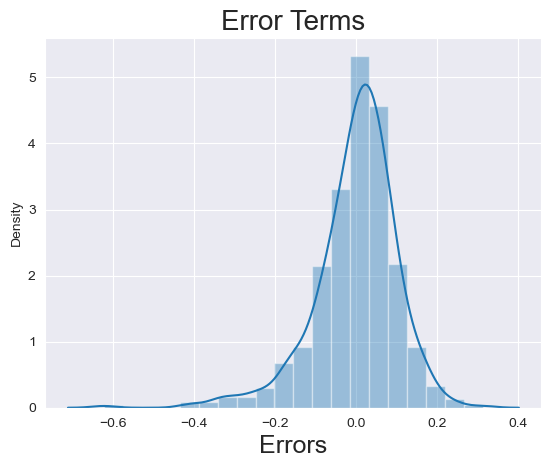

In [50]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.set_style("darkgrid")
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading 
plt.title('Error Terms', fontsize = 20) 
# X-label
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

### 2.Validating if error terms are independent of each other

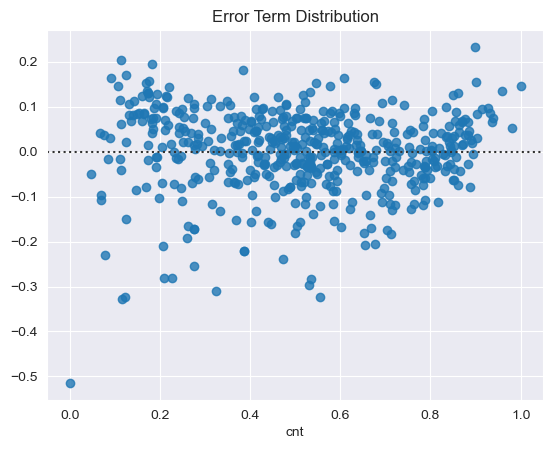

In [51]:
# Residual analysis to verify if error terms are independent of each other
sns.set_style("darkgrid")
sns.residplot(x=y_train, y=y_train - y_train_pred)
plt.title("Error Term Distribution")
plt.show()

### 3.Verifying model for Homoscedasticity

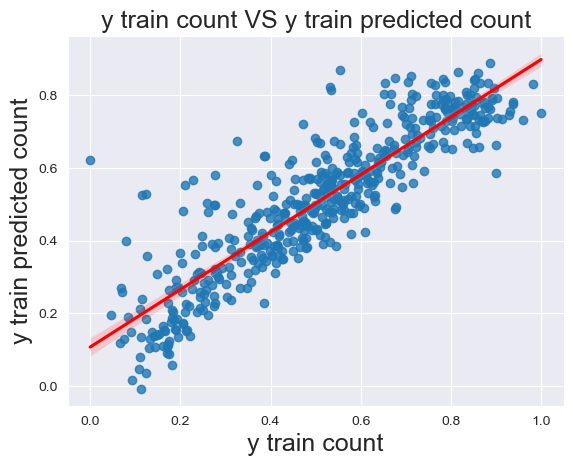

In [52]:
fig = plt.figure()
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "red"})
# Plot heading
plt.title('y train count VS y train predicted count', fontsize = 18)
# X-label
plt.xlabel('y train count', fontsize = 18)                          
plt.ylabel('y train predicted count', fontsize = 18)
plt.show()

### Validating the assumptions of linear regression in the model: Observations

1. Normal Distribution: The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

2. Independent: As per the residual plot of error term it can be observed that error terms are independent of each other, there is no pattern observed

3. Error terms has constant Variance: Heteroscedasticity is not observed in the error terms so we can say that it is truly homoscedastic

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and have done the residual analysis, making predictions using the final (Model#8 with 9 variables)

#### Applying the scaling on the test sets

In [53]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [55]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# Creating X_test_const dataframe by dropping variables from X_test
X_test_const = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_const = sm.add_constant(X_test_const)

In [57]:
# Making predictions
y_test_pred = lm.predict(X_test_const)

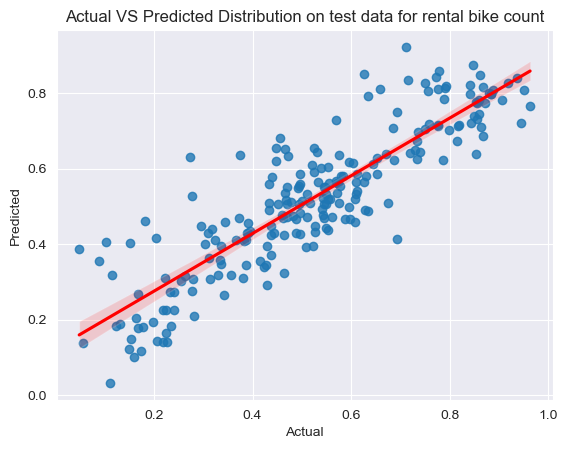

In [58]:
# Comparing Actual VS Predicted Distribution on test data
plt.figure()
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Actual VS Predicted Distribution on test data for rental bike count')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Comparing R2 of test and train data

In [59]:
from sklearn.metrics import r2_score
print("R2 of test data: ",r2_score(y_test, y_test_pred)) # Printing R2 of test data
print("R2 of training data: ",r2_score(y_train, y_train_pred)) # Printing R2 of training data

R2 of test data:  0.7700449632561788
R2 of training data:  0.7914735022829061


### Observation:
- #### R-Squared of Test and Training data are within the acceptable range

### Printing final model summary again to create equation of the best fitted line

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.99e-164
Time:                        00:19:51   Log-Likelihood:                 438.66
No. Observations:                 510   AIC:                            -857.3
Df Residuals:                     500   BIC:                            -815.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1296      0.019      6.921      0.000       0.093       0.166
yr                      0.2385      0.009     25.876      0.000       0.220       0.257
holiday                -0.0915      0.029     -3.122      0.002      -0.149      -0.034
temp                    0.5489      0.022     24.720      0.000       0.505       0.593
windspeed              -0.1820      0.028     -6.501      0.000      -0.237      -0.127
season_summer           0.0879      0.012      7.594      0.000       0.065       0.111
season_winter           0.1165      0.012     10.070      0.000       0.094       0.139
mnth_sept               0.0892      0.018      5.041      0.000       0.054       0.124
weekday_sun            -0.0428      0.013     -3.255      0.001      -0.069      -0.017
weathersit_moderate    -0.0667      0.010     -6.846      0.000      -0.086      -0.048
==============================================================================
Omnibus:                      135.001   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.467
Skew:                          -1.200   Prob(JB):                    1.03e-100
Kurtosis:                       6.989   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Equation of the best fitted line is:
    cnt = 0.2385*yr  - 0.0915*holiday + 0.5489*temp -0.1820*windspeed + 0.0879*season_summer + 0.1165*season_winter + 0.0892*mnth_sept - 0.0428*weekday_sun - 0.0667*weathersit_moderate + 0.1296

In [61]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.010481785865095284
Mean squared error of the test set is 0.010995134401018366


# Summary:


1) The R-squared value of the train set is 79.15% whereas the test set has a value of 77.00% which suggests that the model broadly explains the variance quite accurately on the test set, so it can be concluded that it is a good model. Also the Adjusted R-squared for training data is 78.8% which is very close to R-squared.

2) Developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set.  

3) As per the model below variables are significant for shared bike demand, `temp`, `year` and `season winter` been the most significant:
- yr
- holiday
- temp
- windspeed
- season_summer
- season_winter
- mnth_sept
- weekday_sun
- weathersit_moderate

    cnt = 0.2385*yr  - 0.0915*holiday + 0.5489*temp -0.1820*windspeed + 0.0879*season_summer + 0.1165*season_winter + 0.0892*mnth_sept - 0.0428*weekday_sun - 0.0667*weathersit_moderate + 0.1296